# Data Exploration and Analysis

This notebook loads a transactional dataset from a CSV file and performs initial data exploration. The dataset contains information about financial transactions, including transaction IDs, account details, product categories, amounts, timestamps,fraud results..., . The following steps are included:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### - Loading the dataset into a pandas DataFrame

In [2]:
df = pd.read_csv('../data/raw/data.csv')

### Displaying the first few rows of the data


In [3]:
print(df.head())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

### - Checking the shape and structure of the dataset

In [4]:
print("Shape of dataset:", df.shape)

Shape of dataset: (95662, 16)


### Reviewing column data types and basic statistics

In [5]:
print("\nColumn data types:\n", df.dtypes)


Column data types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


### Get a summary of the dataset

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

## checking for Missing Values 

### Purpose: identifying missing data that could affect analysis or modeling

In [7]:
### Tasks: Calculate the count or percentage of missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values:\n", missing_values)



Missing values:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [8]:

missing_percentage = (missing_values / len(df)) * 100
print("\nMissing values percentage:\n", missing_percentage)


Missing values percentage:
 TransactionId           0.0
BatchId                 0.0
AccountId               0.0
SubscriptionId          0.0
CustomerId              0.0
CurrencyCode            0.0
CountryCode             0.0
ProviderId              0.0
ProductId               0.0
ProductCategory         0.0
ChannelId               0.0
Amount                  0.0
Value                   0.0
TransactionStartTime    0.0
PricingStrategy         0.0
FraudResult             0.0
dtype: float64


**Note**: Calculating the average (percentage) of missing values in each column helps you:

- Quickly identify which columns have missing data and how severe the issue is.
- Prioritize columns for data cleaning or imputation based on the extent of missingness.
- Decide whether to drop columns/rows or apply imputation strategies.
- Understand data quality and potential impact on analysis or modeling.
- Communicate data issues clearly to stakeholders.

## Summary Statistics

**Purpose**: understanding the central tendencies, dispersion, and range of numerical data.

**Tasks**: compute descriptive statistics(mean, median, min, max, ...) for numerical col. <br>
         &nbsp;   &nbsp;    &nbsp;    &nbsp;    &nbsp;  : Identify potential outlier or unusual values 

In [9]:
print("\nSummary statistics:\n", df.describe())


Summary statistics:
        CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


### Identify duplicate rows in the DataFrame

In [10]:

duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])
print(duplicate_rows.head())

Number of duplicate rows: 0
Empty DataFrame
Columns: [TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, CurrencyCode, CountryCode, ProviderId, ProductId, ProductCategory, ChannelId, Amount, Value, TransactionStartTime, PricingStrategy, FraudResult]
Index: []


In [11]:
# Detect inconsistent or invalid entries in the DataFrame

# 1. Check for negative 'Amount' or 'Value' where not expected (e.g., for 'airtime', 'utility_bill', 'tv')
invalid_amount = df[
  ((df['ProductCategory'].isin(['airtime', 'utility_bill', 'tv'])) & (df['Amount'] < 0))
]

# 2. Check for invalid 'CurrencyCode' (should be 3 uppercase letters)
invalid_currency = df[~df['CurrencyCode'].str.match(r'^[A-Z]{3}$')]

# 3. Check for invalid 'CountryCode' (should be numeric and length 3)
invalid_country = df[~df['CountryCode'].astype(str).str.match(r'^\d{3}$')]

# 4. Check for 'TransactionStartTime' not in ISO format
invalid_time = df[~df['TransactionStartTime'].str.match(r'^\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}Z$')]

# 5. Check for negative 'Value'
invalid_value = df[df['Value'] < 0]

In [12]:
print("Invalid Amounts:\n", invalid_amount)

Invalid Amounts:
               TransactionId         BatchId       AccountId  \
90      TransactionId_74975  BatchId_100500  AccountId_4249   
119     TransactionId_15240  BatchId_138225  AccountId_4249   
265     TransactionId_31252  BatchId_136750  AccountId_4249   
266     TransactionId_27902  BatchId_136874  AccountId_4249   
626     TransactionId_20966   BatchId_26095    AccountId_10   
...                     ...             ...             ...   
95104   TransactionId_23311   BatchId_74166    AccountId_10   
95200  TransactionId_136599   BatchId_49904    AccountId_10   
95226   TransactionId_38788  BatchId_111780    AccountId_10   
95293   TransactionId_60750   BatchId_63390    AccountId_10   
95328    TransactionId_6313   BatchId_50857    AccountId_10   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
90     SubscriptionId_4429  CustomerId_7476          UGX          256   
119    SubscriptionId_4429  CustomerId_7437          UGX          256   
265   

In [13]:

print("\nInvalid Currency Codes:\n", invalid_currency)



Invalid Currency Codes:
 Empty DataFrame
Columns: [TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, CurrencyCode, CountryCode, ProviderId, ProductId, ProductCategory, ChannelId, Amount, Value, TransactionStartTime, PricingStrategy, FraudResult]
Index: []


In [14]:

print("\nInvalid Country Codes:\n", invalid_country)


Invalid Country Codes:
 Empty DataFrame
Columns: [TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, CurrencyCode, CountryCode, ProviderId, ProductId, ProductCategory, ChannelId, Amount, Value, TransactionStartTime, PricingStrategy, FraudResult]
Index: []


In [15]:

print("\nInvalid TransactionStartTime:\n", invalid_time)


Invalid TransactionStartTime:
 Empty DataFrame
Columns: [TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, CurrencyCode, CountryCode, ProviderId, ProductId, ProductCategory, ChannelId, Amount, Value, TransactionStartTime, PricingStrategy, FraudResult]
Index: []


In [16]:

print("\nInvalid Values:\n", invalid_value)


Invalid Values:
 Empty DataFrame
Columns: [TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, CurrencyCode, CountryCode, ProviderId, ProductId, ProductCategory, ChannelId, Amount, Value, TransactionStartTime, PricingStrategy, FraudResult]
Index: []


In [17]:
# Review statistics for categorical columns using value_counts()
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
  print(f"\nValue counts for '{col}':")
  print(df[col].value_counts().head(10))  # Show top 10 most frequent values


Value counts for 'TransactionId':
TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
TransactionId_130161    1
Name: count, dtype: int64

Value counts for 'BatchId':
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_34879      6
BatchId_86880      6
Name: count, dtype: int64

Value counts for 'AccountId':
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64

Value counts for 'SubscriptionId':
SubscriptionId
SubscriptionId_3829    32630
Subsc

## Distribution of Numerical Features

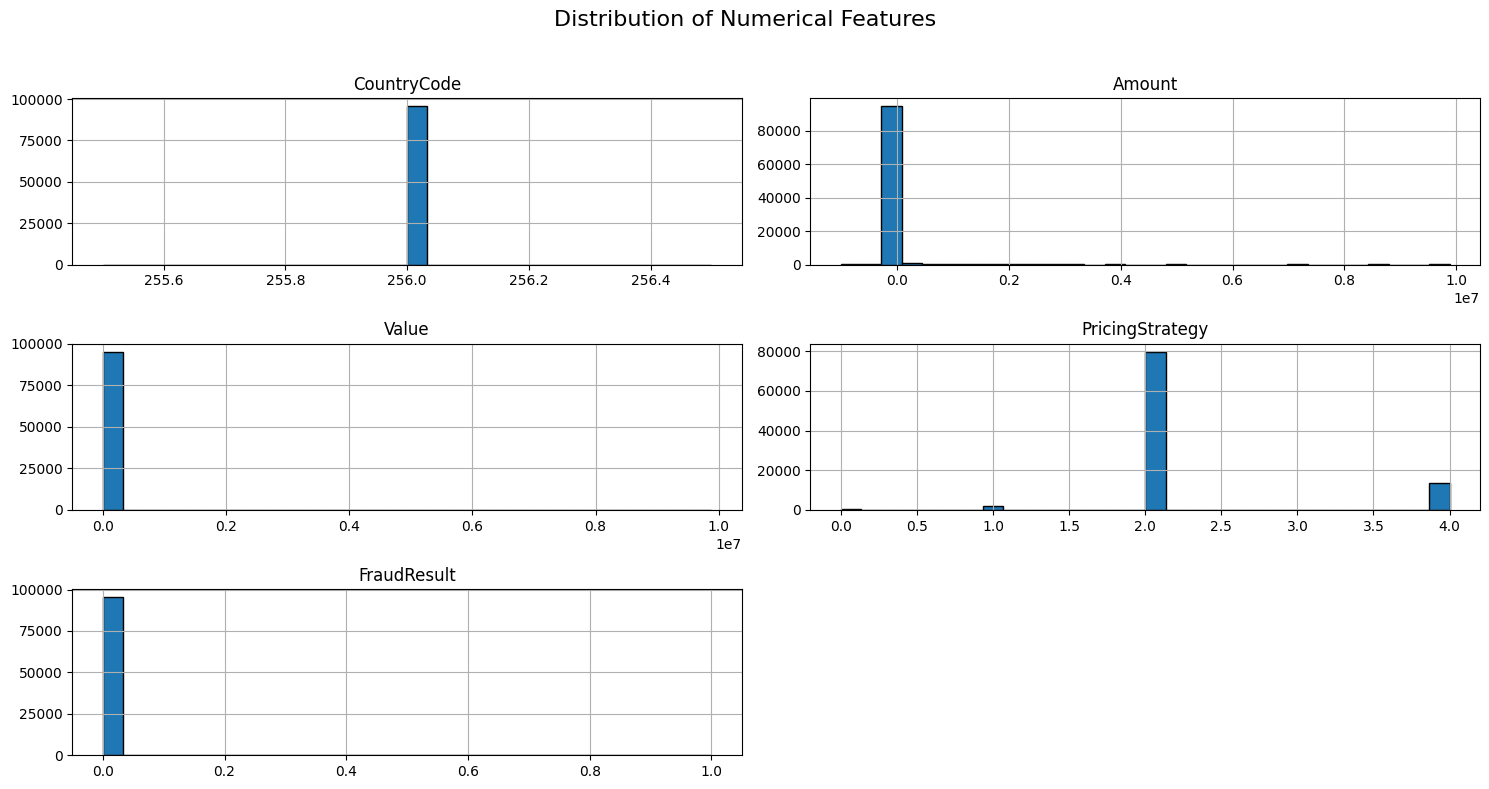

In [18]:

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numerical feature
df[numerical_cols].hist(figsize=(15, 8), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##  Correlation Analysis:
Correlation analysis measures the strength and direction of linear relationships between pairs of numerical variables. The correlation coefficient (r) ranges from -1 to 1:
- **r ≈ 1**: strong positive correlation (as one variable increases, so does the other)
- **r ≈ -1**: strong negative correlation (as one variable increases, the other decreases)
- **r ≈ 0**: little or no linear relationship

Typical interpretation:
- |r| < 0.1: negligible
- 0.1 ≤ |r| < 0.3: weak
- 0.3 ≤ |r| < 0.5: moderate
- |r| ≥ 0.5: strong

This section examines the relationships between numerical features in the dataset using a correlation matrix. Correlation analysis helps identify how strongly pairs of variables are related, which can reveal patterns, multicollinearity, or potential predictors for modeling. The correlation matrix below quantifies these relationships, and the heatmap visualization highlights the strength and direction (positive or negative) of correlations among features such as `Amount`, `Value`, `PricingStrategy`, and `FraudResult`.

**Visual guide to correlation direction:**

| Correlation | Visual Representation | Description                |
|-------------|:--------------------:|----------------------------|
| +1          | ⬆️⬆️ / ↗️↗️           | Strong positive linear     |
|  0          | ➡️⬆️ / scattered      | No linear relationship     |
| -1          | ⬆️⬇️ / ↗️↘️           | Strong negative linear     |

- **+1**: As X increases, Y increases (perfect positive line)
- **0**: No clear pattern (points scattered)
- **-1**: As X increases, Y decreases (perfect negative line)

*See the heatmap below for actual correlations in your data.*

Correlation matrix:
                  CountryCode    Amount     Value  PricingStrategy  FraudResult
CountryCode              NaN       NaN       NaN              NaN          NaN
Amount                   NaN  1.000000  0.989692        -0.061931     0.557370
Value                    NaN  0.989692  1.000000        -0.017020     0.566739
PricingStrategy          NaN -0.061931 -0.017020         1.000000    -0.033821
FraudResult              NaN  0.557370  0.566739        -0.033821     1.000000


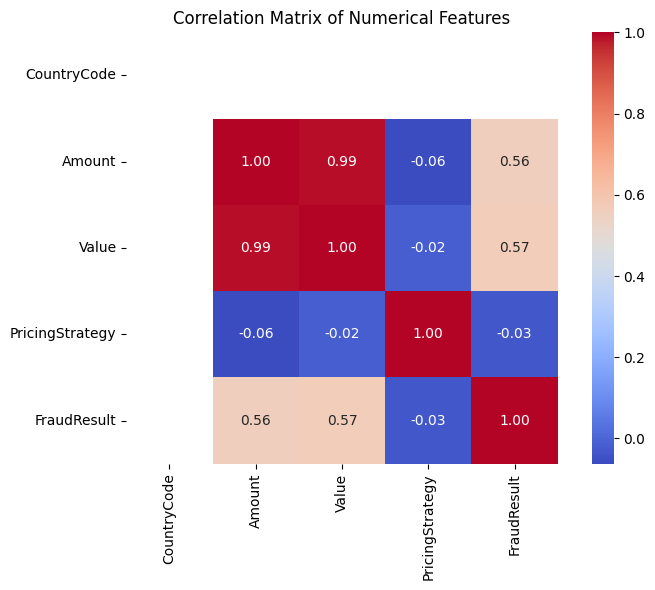

In [20]:
# Correlation Analysis: Compute and visualize correlation matrix for numerical features

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Display correlation matrix
print("Correlation matrix:\n", corr_matrix)

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the count of missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [24]:

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values per column:\n", missing_percentage)


Percentage of missing values per column:
 TransactionId           0.0
BatchId                 0.0
AccountId               0.0
SubscriptionId          0.0
CustomerId              0.0
CurrencyCode            0.0
CountryCode             0.0
ProviderId              0.0
ProductId               0.0
ProductCategory         0.0
ChannelId               0.0
Amount                  0.0
Value                   0.0
TransactionStartTime    0.0
PricingStrategy         0.0
FraudResult             0.0
dtype: float64


 All missing values are zero because the dataset is complete—there are no null or missing entries in any column.
This indicates good data quality and means no imputation or removal of missing data is needed for further analysis.

In [ ]:
# Impute missing values for numerical columns with median, categorical with mode

# Numerical columns: fill missing with median
for col in numerical_cols:
  if df[col].isnull().any():
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Categorical columns: fill missing with mode
for col in categorical_cols:
  if df[col].isnull().any():
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

# Check if missing values remain
print("Missing values after imputation:\n", df.isnull().sum())

This code fills missing values in the DataFrame `df`:

- For each numerical column in `numerical_cols`, if there are missing values, it fills them with the column's median.
- For each categorical column in `categorical_cols`, if there are missing values, it fills them with the column's mode (most frequent value).
- After imputation, it prints the count of missing values in each column to confirm all missing data has been handled.

In this dataset, there are no missing values, so this code will not change anything, and the printed output will show zeros for all columns.


<Figure size 1500x800 with 0 Axes>

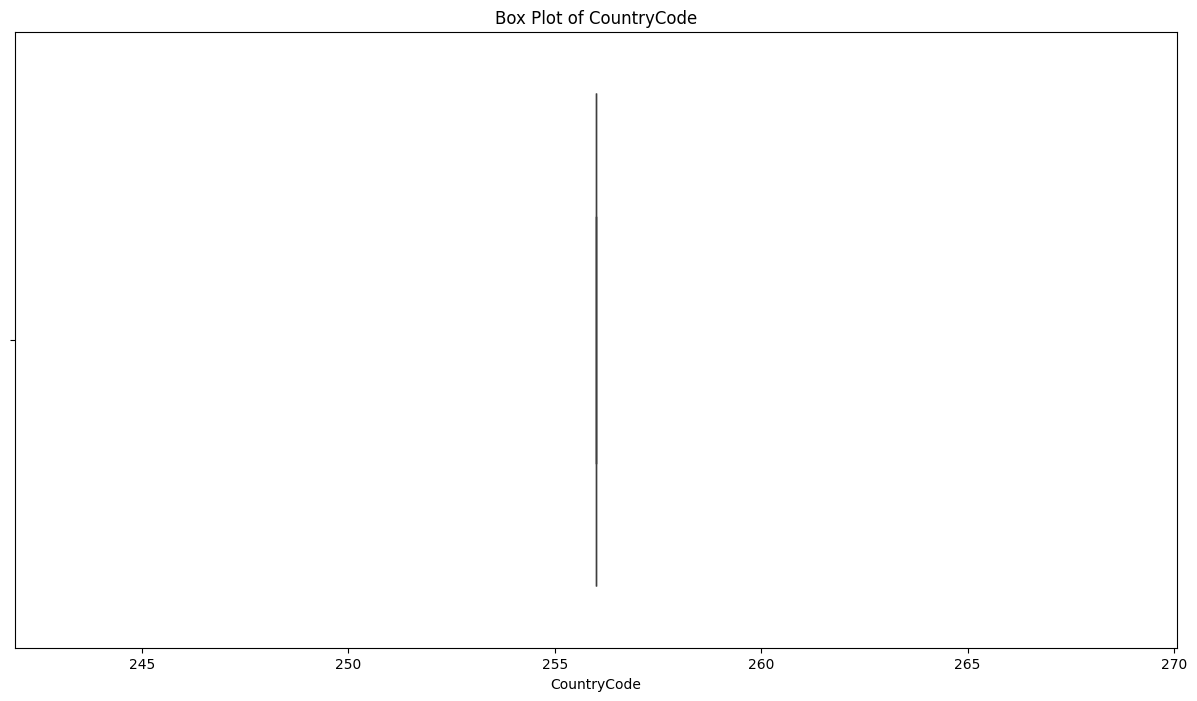

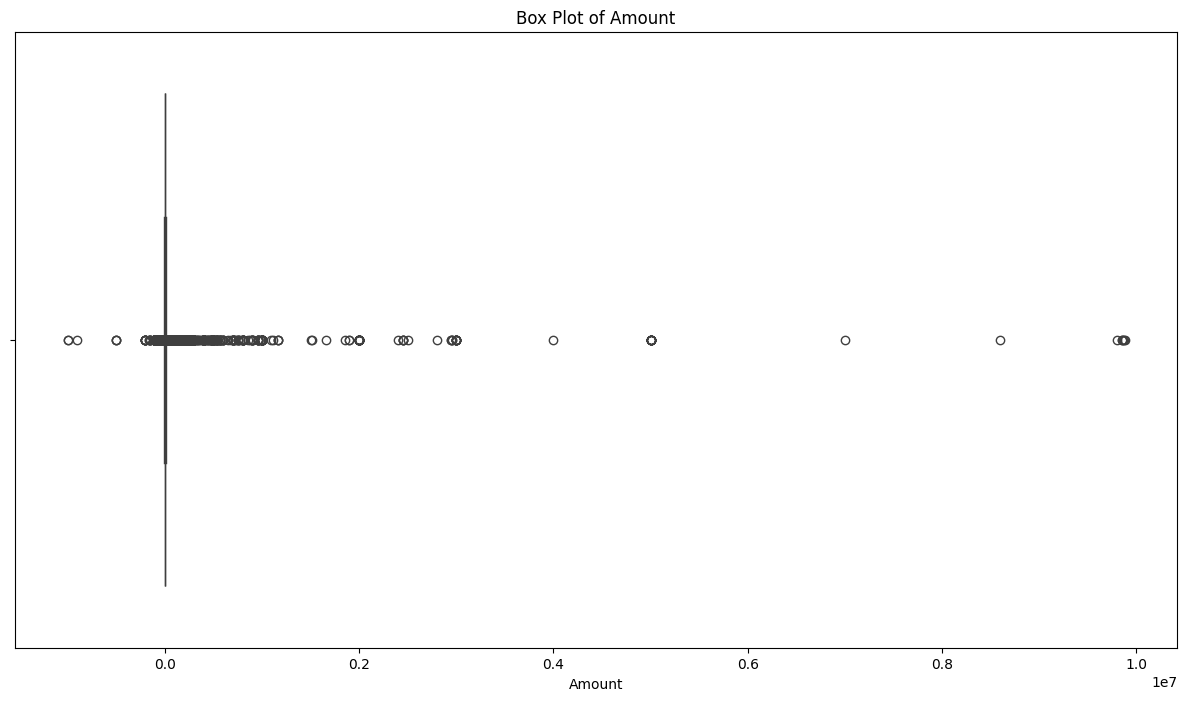

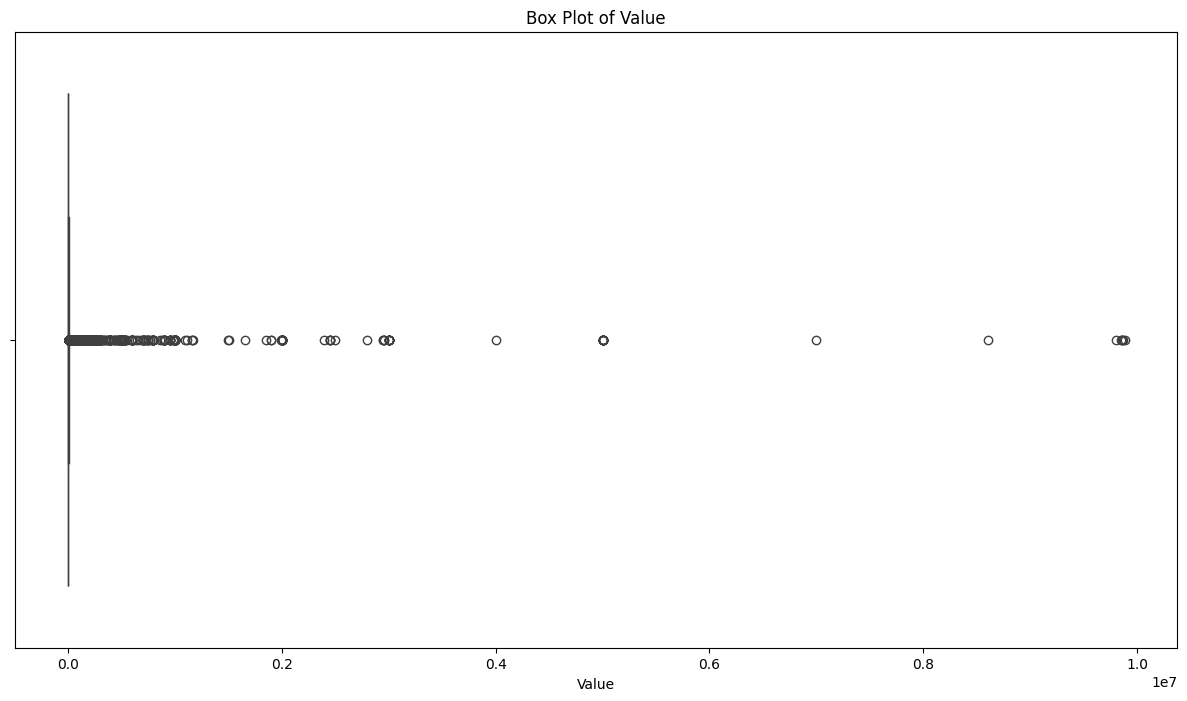

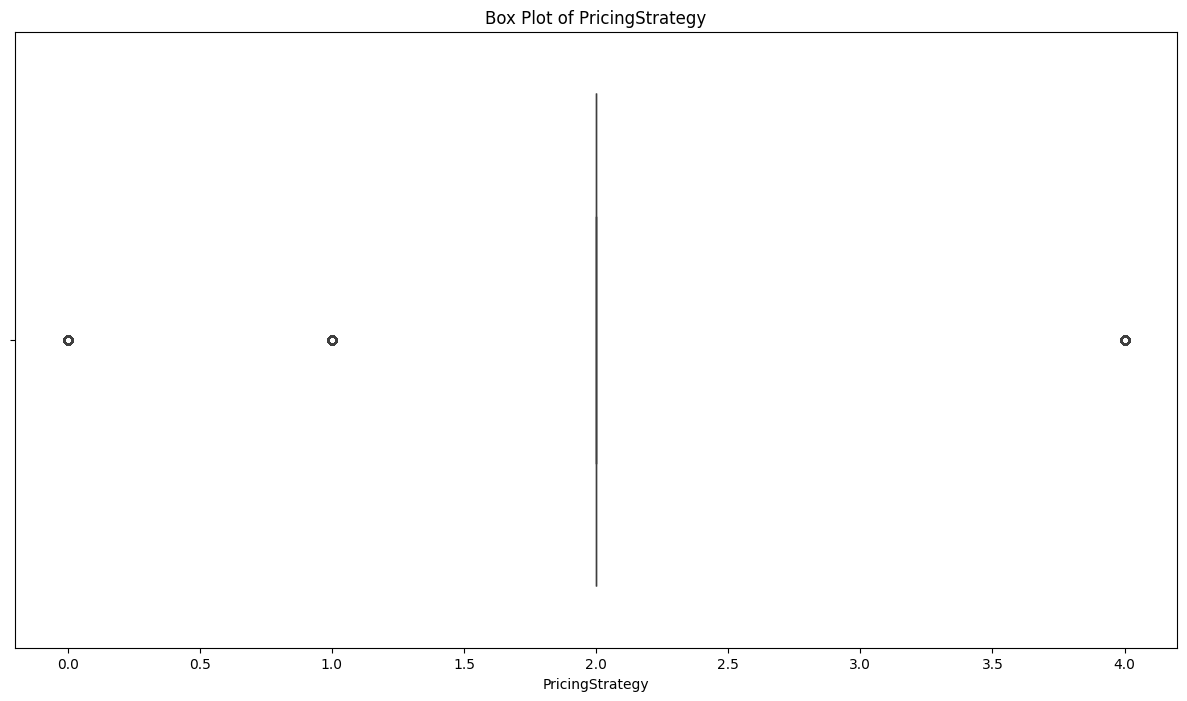

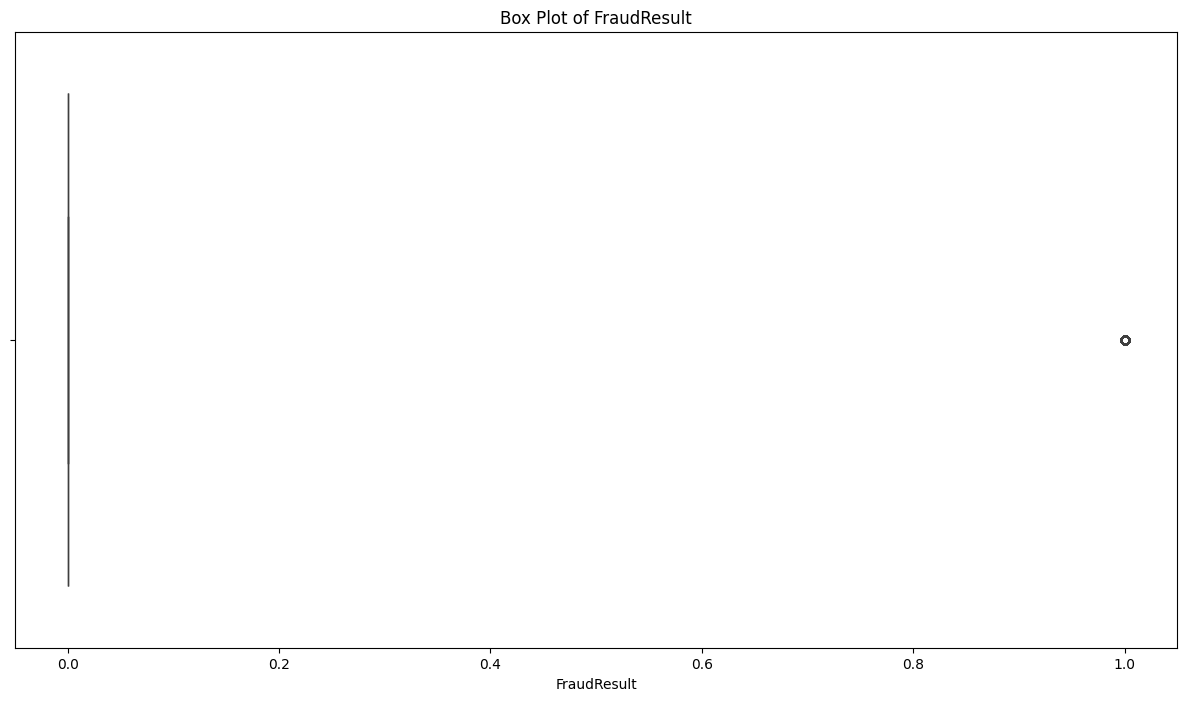

In [30]:
# Box plots for numerical columns to identify outliers
plt.figure(figsize=(15, 8))
for col in numerical_cols:
    plt.figure(figsize=(15, 8))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [33]:
# Describe the result of the z-score output for outlier detection

print(f"Total rows in dataset: {df.shape[0]}")
print(f"Number of outlier rows detected (|Z| > {threshold}): {outliers.shape[0]}")
print("\nSample outlier rows:")
print(outliers.head())

print("\nInterpretation:")
print(f"- Z-scores were calculated for numerical columns: {list(numerical_cols)}.")
print(f"- Rows where any numerical column's absolute z-score exceeded {threshold} were flagged as outliers.")
print(f"- {outliers.shape[0]} out of {df.shape[0]} rows are considered outliers based on this threshold.")
print("- These outliers may represent unusual or extreme values in the data, which could be due to data entry errors, rare events, or genuine anomalies.")
print("- Review these rows to decide whether to exclude, investigate, or treat them differently in further analysis.")

Total rows in dataset: 95662
Number of outlier rows detected (|Z| > 3): 618

Sample outlier rows:
           TransactionId         BatchId       AccountId       SubscriptionId  \
131  TransactionId_60873   BatchId_93685  AccountId_3832  SubscriptionId_4161   
143  TransactionId_55055   BatchId_75683   AccountId_168  SubscriptionId_1914   
146  TransactionId_28016  BatchId_125553  AccountId_2366  SubscriptionId_4834   
155   TransactionId_1149   BatchId_10381  AccountId_3832  SubscriptionId_4161   
158  TransactionId_37796   BatchId_75165  AccountId_4140  SubscriptionId_1617   

          CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
131  CustomerId_4275          UGX          256  ProviderId_3  ProductId_15   
143  CustomerId_7453          UGX          256  ProviderId_5   ProductId_9   
146  CustomerId_7414          UGX          256  ProviderId_5   ProductId_9   
155  CustomerId_4275          UGX          256  ProviderId_3  ProductId_15   
158  CustomerId_4592     

## Univariate analysis: visualize distributions of individual variables

## Numerical features: histograms and boxplots

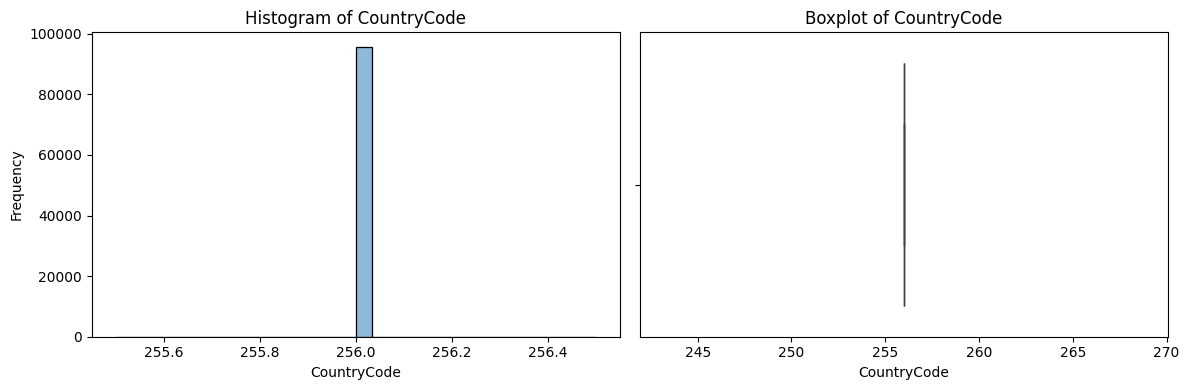

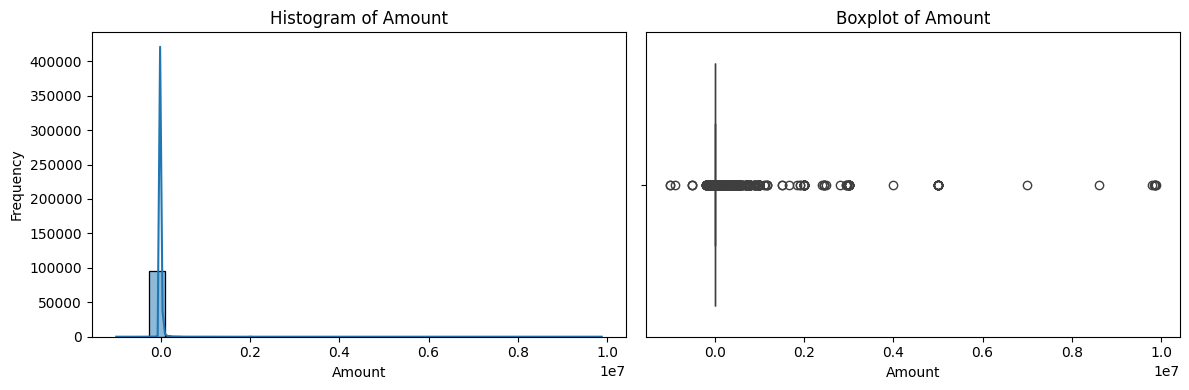

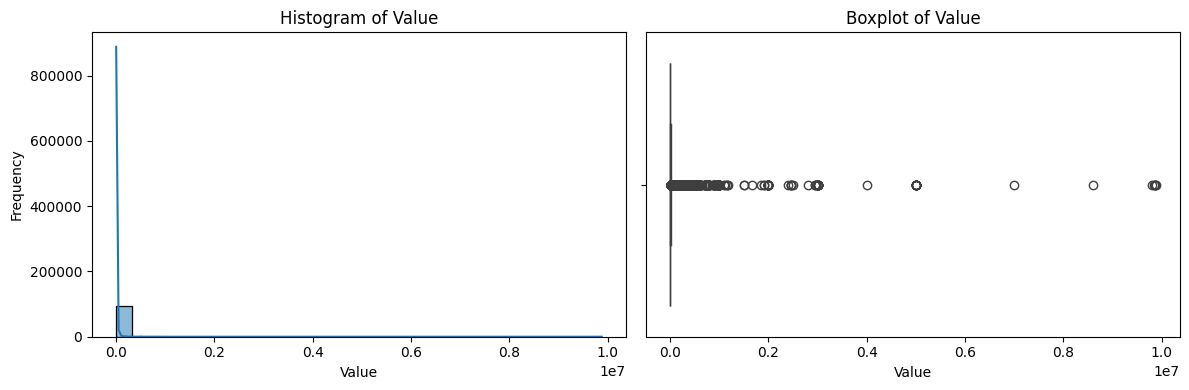

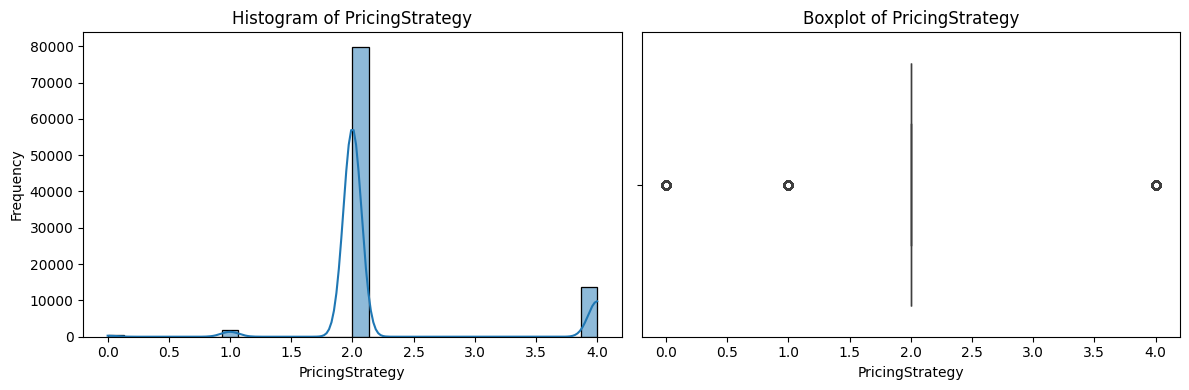

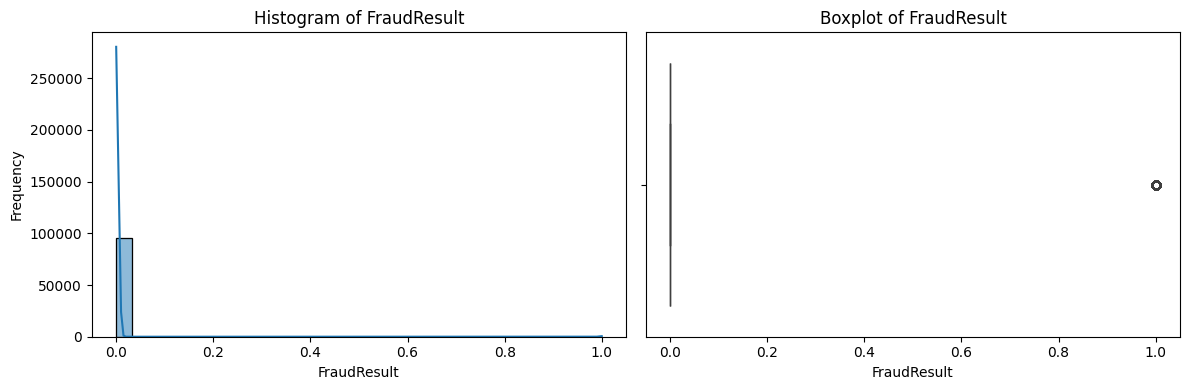

In [34]:
# Numerical features: histograms and boxplots
for col in numerical_cols:
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  sns.histplot(df[col], bins=30, kde=True)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

  plt.subplot(1, 2, 2)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)

  plt.tight_layout()
  plt.show()

## Distribution of Categorical Features 

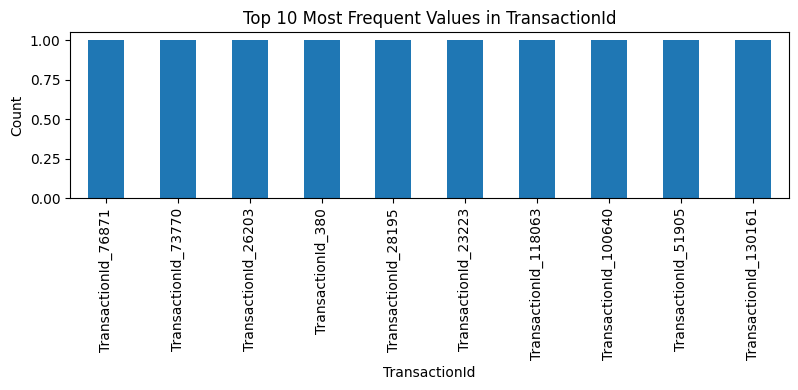

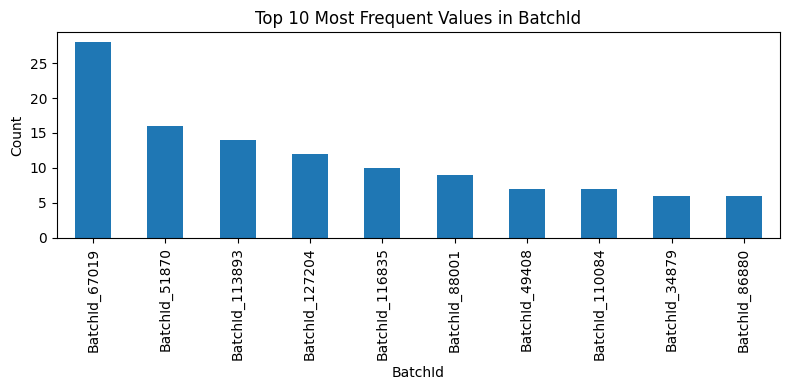

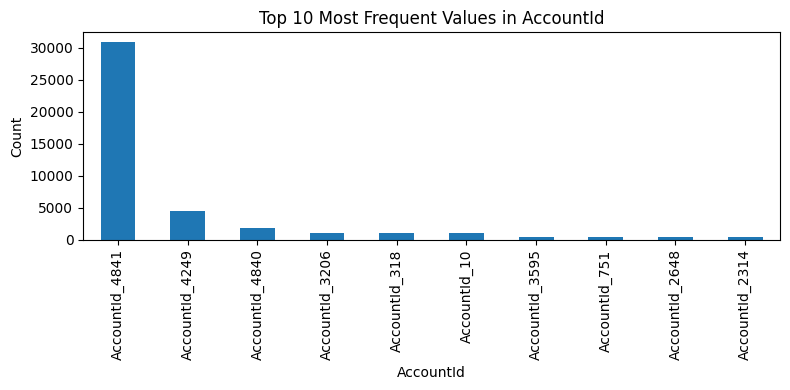

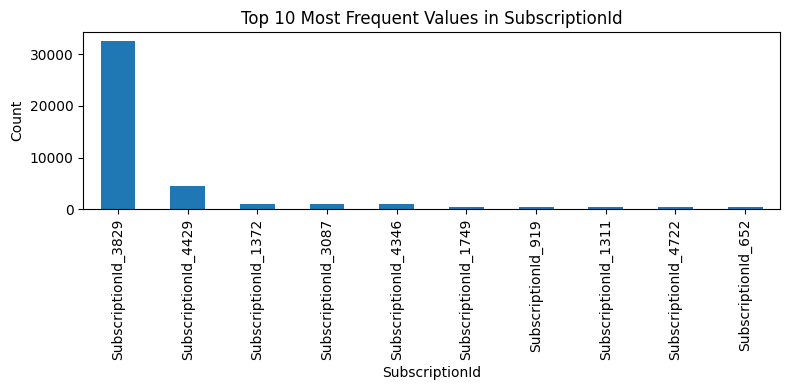

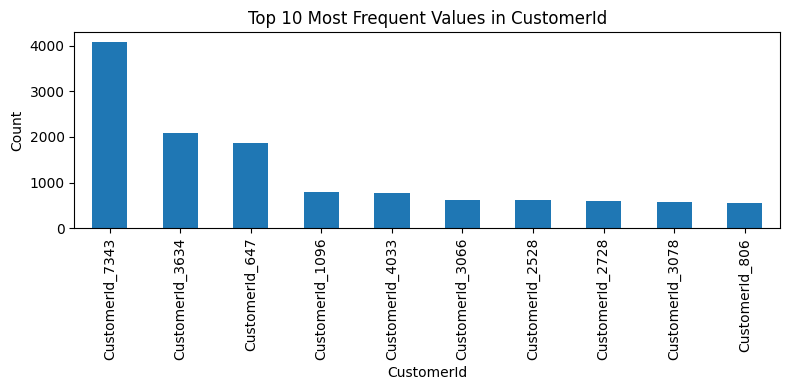

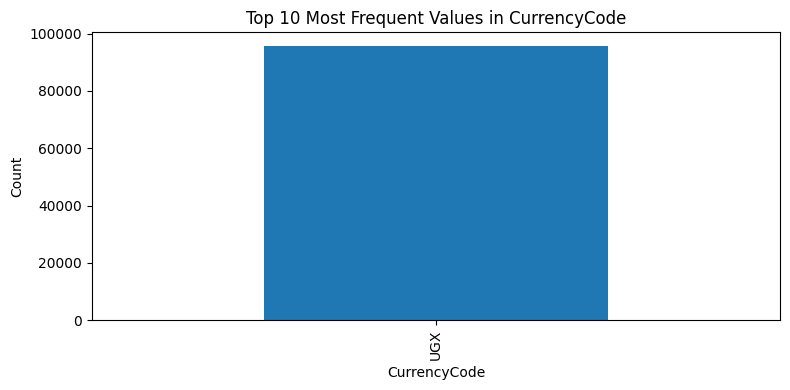

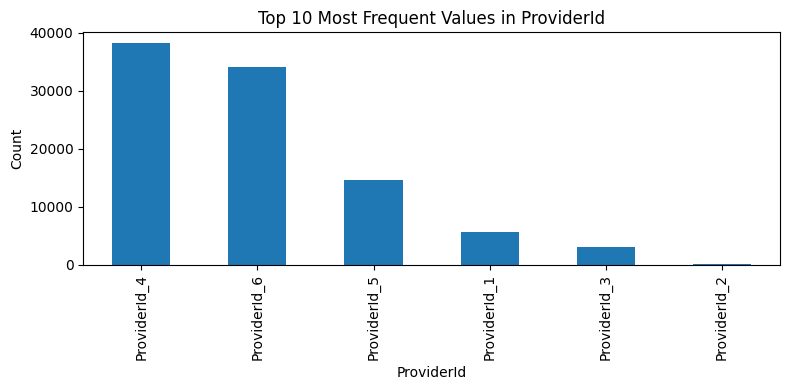

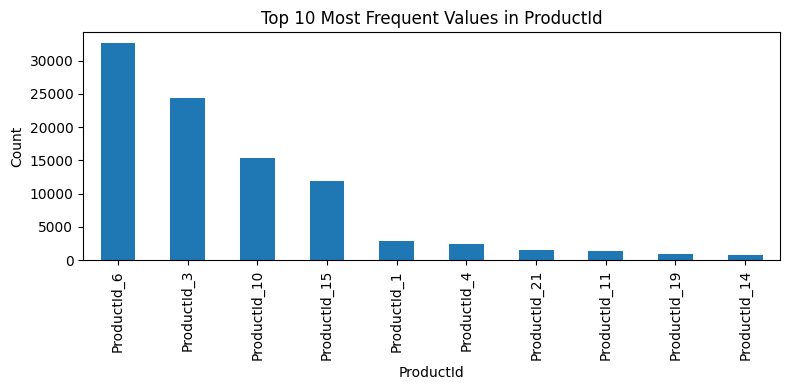

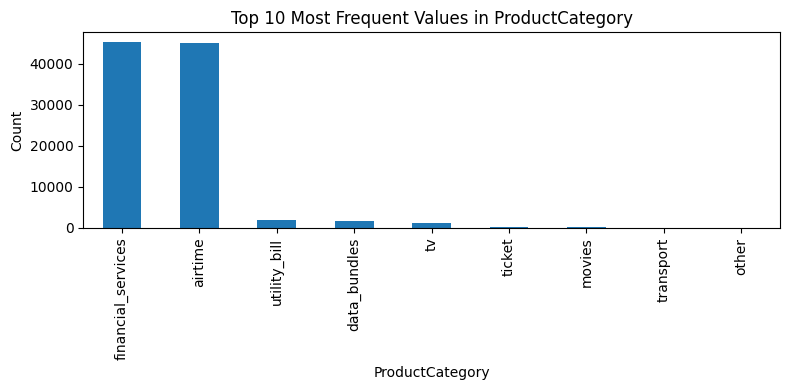

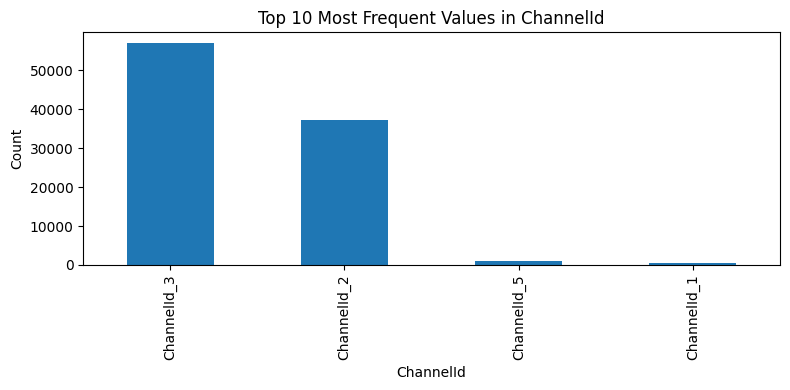

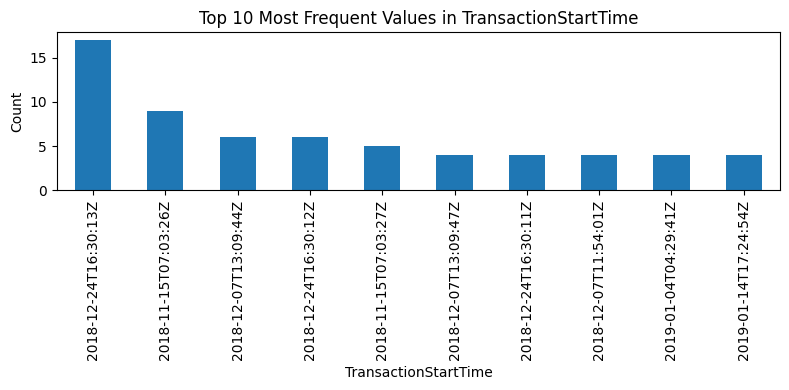

In [35]:

# Categorical features: bar charts for top 10 categories
for col in categorical_cols:
  plt.figure(figsize=(8, 4))
  df[col].value_counts().head(10).plot(kind='bar')
  plt.title(f'Top 10 Most Frequent Values in {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.tight_layout()
  plt.show()

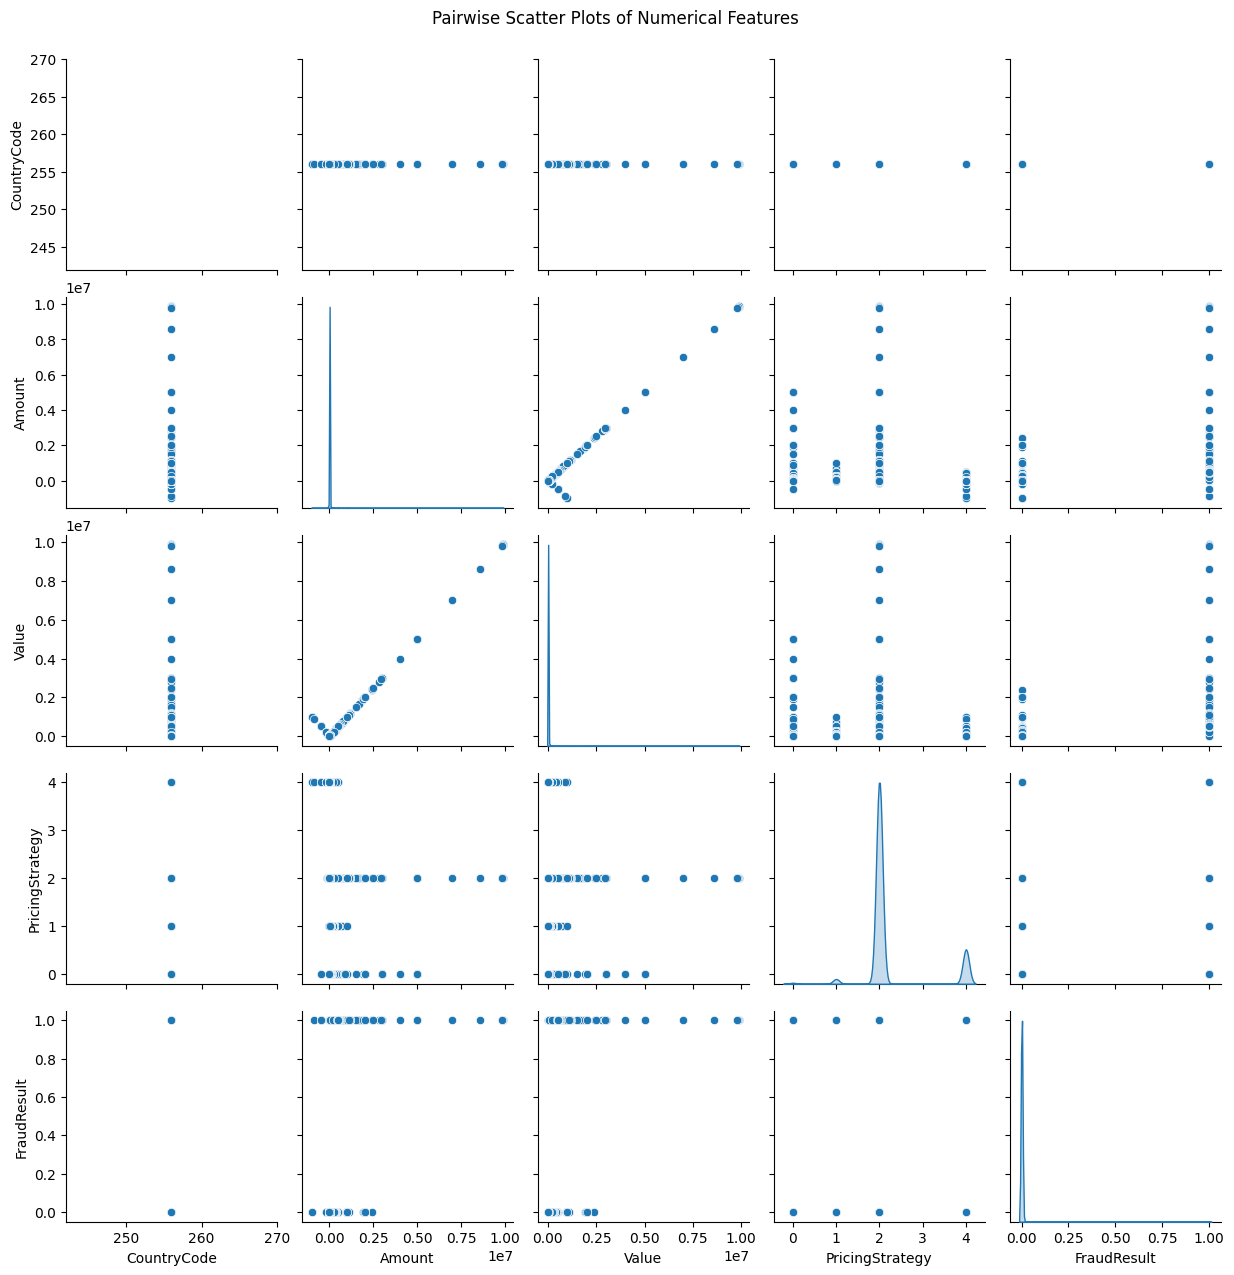

Mean Amount and Value by ProductCategory:
                            Amount          Value
ProductCategory                                 
transport           170240.000000  170240.000000
ticket               96696.759259   96696.759259
utility_bill         17232.858854   20946.692188
tv                   16641.125880   18156.438624
financial_services   11435.559465   12734.467570
movies                7734.285714   10988.000000
data_bundles          3402.169870    3714.011159
airtime                822.956426    6049.799609
other                  500.000000     500.000000


In [37]:
# Scatter plots for pairs of important numerical variables
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.suptitle('Pairwise Scatter Plots of Numerical Features', y=1.02)
plt.show()

# Groupby summaries: mean Amount and Value by ProductCategory
grouped_summary = df.groupby('ProductCategory')[['Amount', 'Value']].mean().sort_values('Amount', ascending=False)
print("Mean Amount and Value by ProductCategory:\n", grouped_summary)



# End...